# Data processing examples from student admission project

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 3 rows of our data
data[:3]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


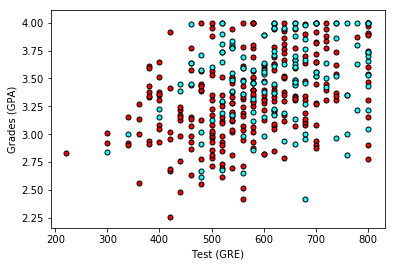

In [2]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[['gre','gpa']])
    y = np.array(data['admit'])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

In [3]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 3 rows of our data
one_hot_data[:3]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0


In [4]:
# Scaling the data
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre'] / 800
processed_data['gpa'] = processed_data['gpa'] / 4.0
processed_data[:3]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0


In [5]:
# choose the data randomly
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:3])
print(test_data[:3])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
47       0  0.625  0.7425       0       0       0       1
91       1  0.900  0.9100       1       0       0       0
312      0  0.825  0.9425       0       0       1       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
4       0  0.650  0.7325       0       0       0       1
8       1  0.675  0.8475       0       0       1       0
33      1  1.000  1.0000       0       0       1       0


In [6]:
import keras

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
# use keras.utils.to_categorical to one-hot encoding targets
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:3])
print(targets[:3])

Using TensorFlow backend.


[[ 0.625   0.7425  0.      0.      0.      1.    ]
 [ 0.9     0.91    1.      0.      0.      0.    ]
 [ 0.825   0.9425  0.      0.      1.      0.    ]]
[[ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


# Data processing examples from bike rental project

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# this line ensure the figures generated are in high resolution

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data_path = 'Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# check to see what style is available in your current working environment
plt.style.available

['seaborn-darkgrid',
 'seaborn-dark',
 'bmh',
 'grayscale',
 'seaborn-whitegrid',
 'dark_background',
 'classic',
 'seaborn',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-white',
 'seaborn-ticks',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-dark-palette',
 'ggplot',
 '_classic_test',
 'seaborn-bright',
 'seaborn-paper']

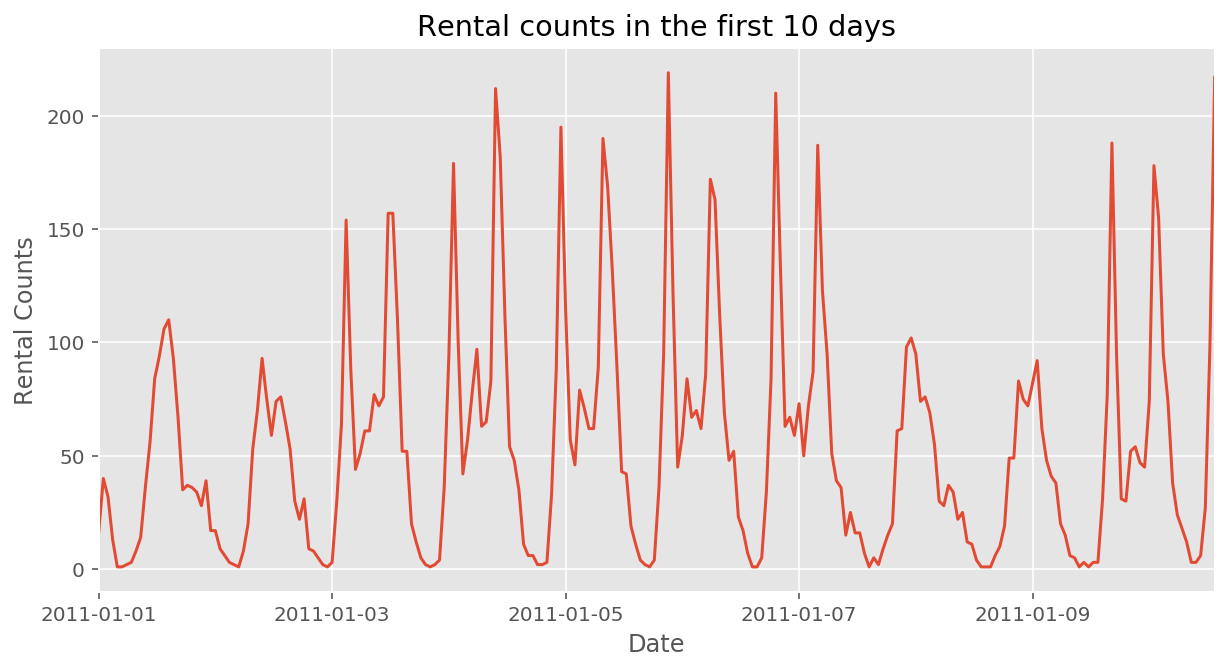

In [10]:
# choose the style you like
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=1) # add this line to take control of the figure configuration later
rides[:24 * 10].plot(x='dteday', y='cnt', ax=ax, figsize=(10, 5)) #set ax=ax to take control of the figure
ax.legend().set_visible(False)
ax.set(title='Rental counts in the first 10 days', ylabel='Rental Counts', xlabel='Date'); 
# this very semicolon stop plt printing out working messages

In [11]:
# this demonstrates how you can one-hot encoding more than one column using pandas
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
# scaling the data with standard values
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data[each] = (data[each] - mean) / std 
    # this line should be write this way for simplicity's sake

In [13]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [14]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]